In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
%matplotlib inline

This jupyter notebook aims to use text data and metadata about wine to create a regression model in which we predict the points a wine taster gives to a specific wine. The dataset comes with information regarding the country, province, region, who the taster is, data about the wine itself, etc.

### Read in Data

In [2]:
winereviews = pd.read_csv('winemag-data-130k-v2.csv').drop('Unnamed: 0',axis=1)
winereviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


### Data Visualization

When we build a regression model we want to explore the data in its entireity. For this part of the jupyter notebook, I will visualize the data before preprocessing.

Text(0.5,1,'Does Price Imply Better Wine? $r$=0.612')

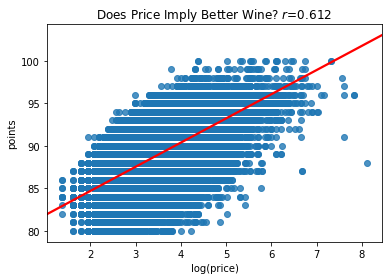

In [4]:
# correlation between points and price
slope, intercept, r_value, p_value, std_err = linregress(x=np.log(winereviews['price'].loc[pd.notna(winereviews['price'])]),y=winereviews['points'].loc[pd.notna(winereviews['price'])])

sns.regplot(x=np.log(winereviews['price'].loc[pd.notna(winereviews['price'])]),y=winereviews['points'].loc[pd.notna(winereviews['price'])],line_kws={"color":"r"})
plt.xlabel('log(price)')
plt.title(f'Does Price Imply Better Wine? $r$={round(r_value,3)}')

A common idea is that the more expensive the bottle of wine is the better the wine itself is. Here I explore and can confirm this trend. There is a clear correlation between the log of the price of wine and the points the reviewer gives. However, if we square the r-value (otherwise known as pearson's correlation coefficient) the $r^2$ is much lower. This is supported qualitatively by the model. Even though there is a positive trend, the data is not fit well by the line.

I plot two quantitative variables here: the natural log of the price and the points variable. When plotting two quantitative variables the best encoding is to use a scatterplot, as we can effectively display the relationship between two quantitative variables that way. The mark used to show (log(price),points) is a point. The channel we use is position for the points as we want to compare how the changes in price affect the points. I also plot a regression line to show the trend of the data. I use the color red to encode the line in order to avoid occlusion. The mark we use here is a line and the channel we encode is also position as we want to see how the trend line behaves as one moves up or down the x-axis.

Text(0.5,1,'Where are the best wines located?')

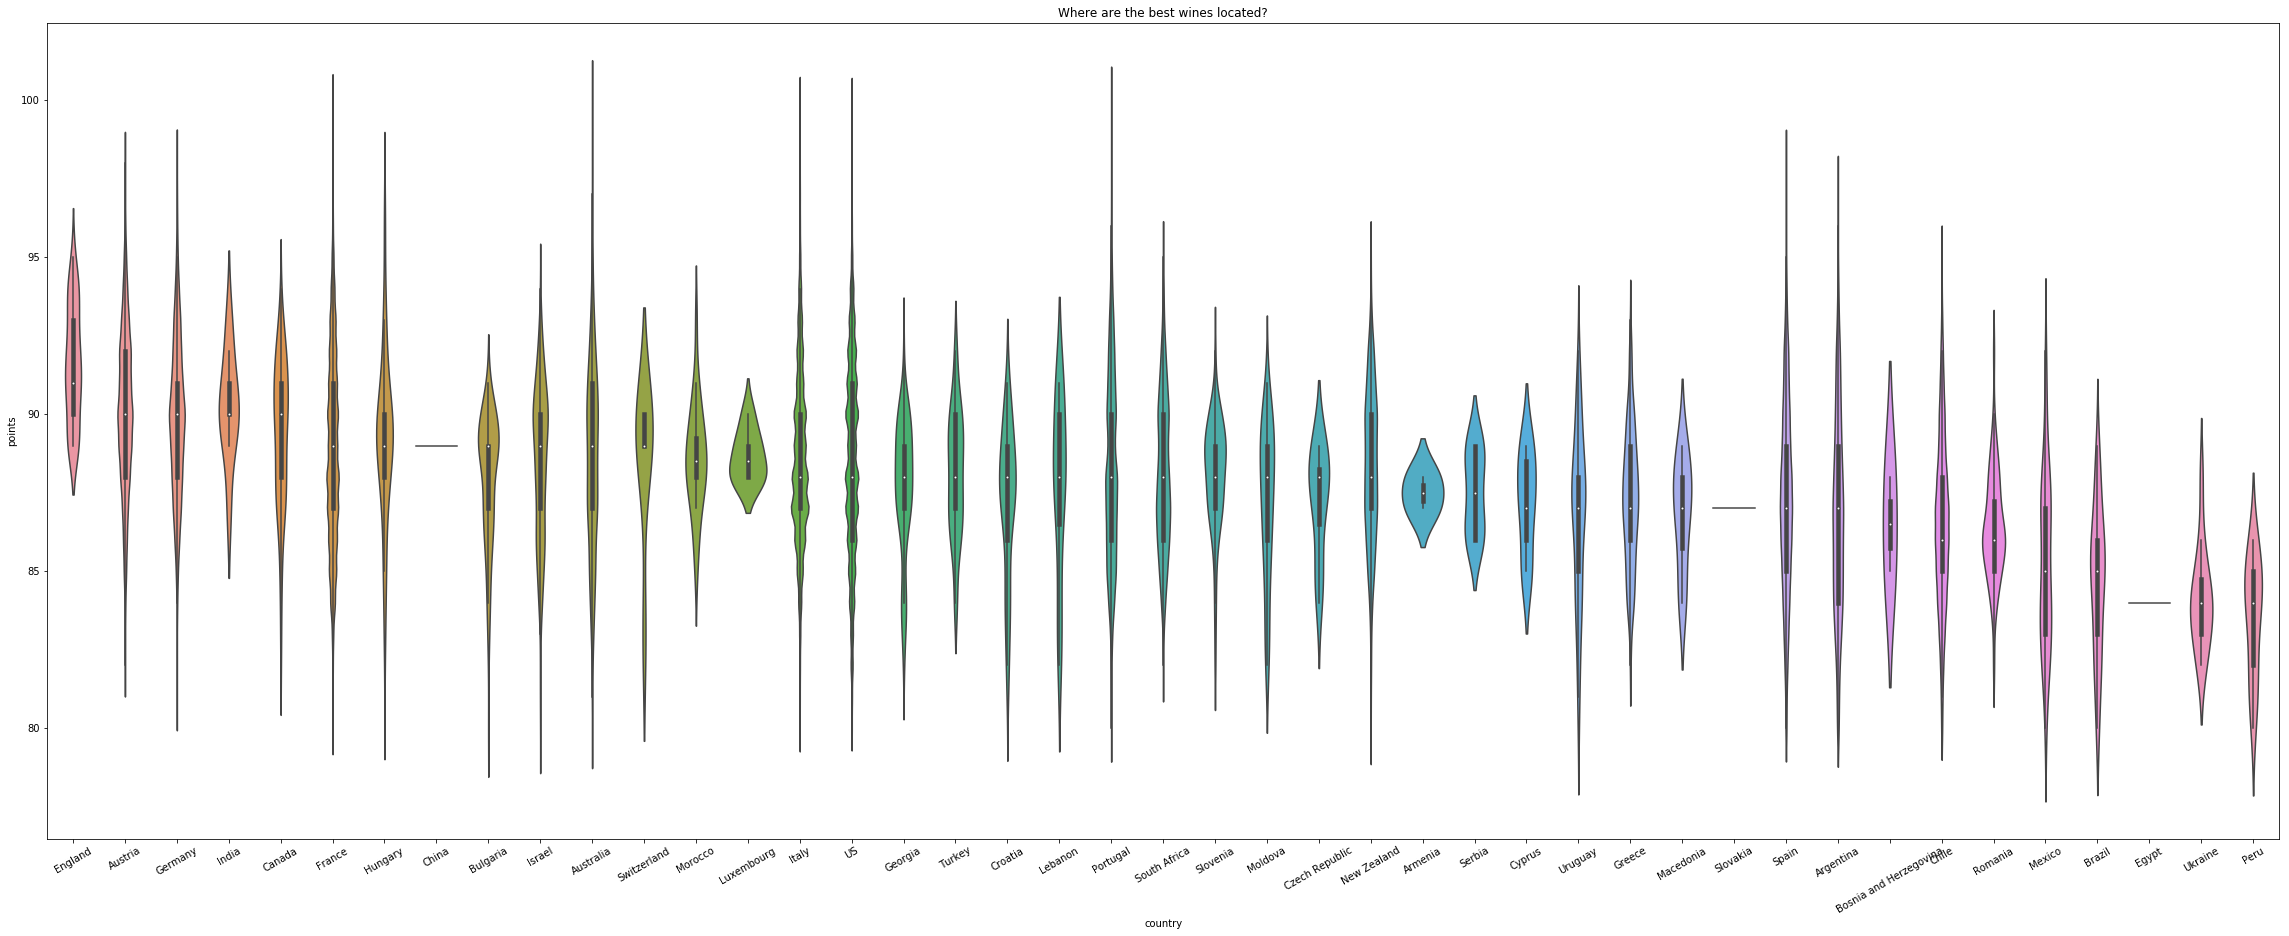

In [5]:
# violin plot of country and points
plt.figure(figsize=(40,15))
decOrder = winereviews.groupby(by=["country"])["points"].median().sort_values(ascending=False).index
vplot = sns.violinplot(data=winereviews,x='country',y='points',order=decOrder)
vplot.set_xticklabels(labels = vplot.get_xticklabels(), rotation=30)
plt.title('Where are the best wines located?')

When people think of wine they think of France. Here I explore the distribution of wines across various countries using a violin plot. These plots are ordered by the median. Surprisingly, France is not the top based on its median, but we can see that the distribution range is very long. England is the country with the highest median. We do see a gradual decrease in the medians of wine price. However, the distributions have various ranges.

Here we encode violinplots to compare distributions. As we've learned, using boxplots for multiple distribution comparisons can be misleading. I encode color here as a redundant way to identify the countries. The mark we use is an area for the violinplots as we are not only concerned with the length of the distribution, but also where in the distribution a majority of the reviews are located. I also use a point mark for the median to identify the median. The channel I encode for the violin plot is primarily position. The same is for the points.

### Dataset preprocessing

In [21]:
winereviews['bottle_date'] = winereviews['title'].str.extract(r'\D([1-2][0-9][0-9][0-9])\D')


In [22]:
X_train, X_test, y_train, y_test = train_test_split(winereviews.drop('points',axis=1),winereviews['points'],test_size=0.2)

In [29]:
# get the mean of quantitative variables by the mean of wine from each country
meanPrice = X_train.groupby('country').mean().reset_index().rename(columns={'price':'mean price'})

# do on train data
X_train = X_train.merge(meanPrice,how='left',on='country')
X_train['price'] = np.where(pd.isna(X_train['price']),X_train['mean price'],X_train['price'])
X_train.drop('mean price',axis=1,inplace=True)
X_train['price'] = np.log(X_train['price'])

# do on test data
X_test = X_test.merge(meanPrice,how='left',on='country')
X_test['price'] = np.where(pd.isna(X_test['price']),X_test['mean price'],X_test['price'])
X_test.drop('mean price',axis=1,inplace=True)
X_test['price'] = np.log(X_test['price'])

In [8]:
# compare the pearson correlation coefficient for both log transform of price and no log transform

slopeLog, interceptLog, r_valueLog, p_valueLog, std_errLog = linregress(x=np.log(winereviews['price'].loc[pd.notna(winereviews['price'])]),y=winereviews['points'].loc[pd.notna(winereviews['price'])])
slope, intercept, r_value, p_value, std_err = linregress(x=winereviews['price'].loc[pd.notna(winereviews['price'])],y=winereviews['points'].loc[pd.notna(winereviews['price'])])

print((r_valueLog, p_valueLog),(r_value,p_value))

(0.6118495019831404, 0.0) (0.4161667418606225, 0.0)


In [24]:
# remove taster information 
X_train.drop(['taster_name','taster_twitter_handle'],axis=1,inplace=True)
X_test.drop(['taster_name','taster_twitter_handle'],axis=1,inplace=True)
X_train

,country,description,designation,price,province,region_1,region_2,title,variety,winery,bottle_date
0,France,"This wine already has great balance, with its ...",Aux Murgers Premier Cru,41.231619,Burgundy,Nuits-St.-Georges,NaN,Domaine Méo-Camuzet 2013 Aux Murgers Premier C...,Pinot Noir,Domaine Méo-Camuzet,2013
1,France,"Warm, fruity and ripe, this offers a good bala...",NaN,20.000000,Burgundy,Bourgogne,NaN,Chartron et Trébuchet 2014 Bourgogne,Chardonnay,Chartron et Trébuchet,2014
2,Italy,Suavia's base Soave Classico opens with an ini...,NaN,17.000000,Veneto,Soave Classico,NaN,Suavia 2010 Soave Classico,Garganega,Suavia,2010
3,Italy,"Thin, bright and easy-going, this food friendl...",NaN,39.412273,Central Italy,Montepulciano d'Abruzzo,NaN,San Lorenzo 2009 Montepulciano d'Abruzzo,Montepulciano,San Lorenzo,2009
4,Portugal,"A spicy, ripe wine that is part of the second ...",DouRosa,26.337325,Douro,NaN,NaN,Quinta de la Rosa 2011 DouRosa Red (Douro),Portuguese Red,Quinta de la Rosa,2011
5,Argentina,Trisagio is a Malbec-led blend with Cab Sauvig...,Trisagio,29.000000,Mendoza Province,Valle de Uco,NaN,Benvenuto de la Serna 2011 Trisagio Red (Valle...,Red Blend,Benvenuto de la Serna,2011
6,US,This wine shows roasted beef with blackberry c...,All-In Sawyer Lindquist Vineyard,60.000000,California,Edna Valley,Central Coast,No Limit 2010 All-In Sawyer Lindquist Vineyard...,Syrah,No Limit,2010
7,Greece,"Alluring aromas of tropical fruit, flower and ...",Emphasis,35.000000,Drama,NaN,NaN,Pavlidis 2010 Emphasis Assyrtico (Drama),Assyrtico,Pavlidis,2010
8,US,"Slightly dusty, but piquant aromas of freshly ...",Dry,18.000000,Michigan,Old Mission Peninsula,NaN,Peninsula 2010 Dry Riesling (Old Mission Penin...,Riesling,Peninsula,2010
9,US,"This wine has a restrained nose, featuring woo...",NaN,20.000000,Virginia,Virginia,NaN,Chateau Morrisette 2008 Petit Verdot (Virginia),Petit Verdot,Chateau Morrisette,2008


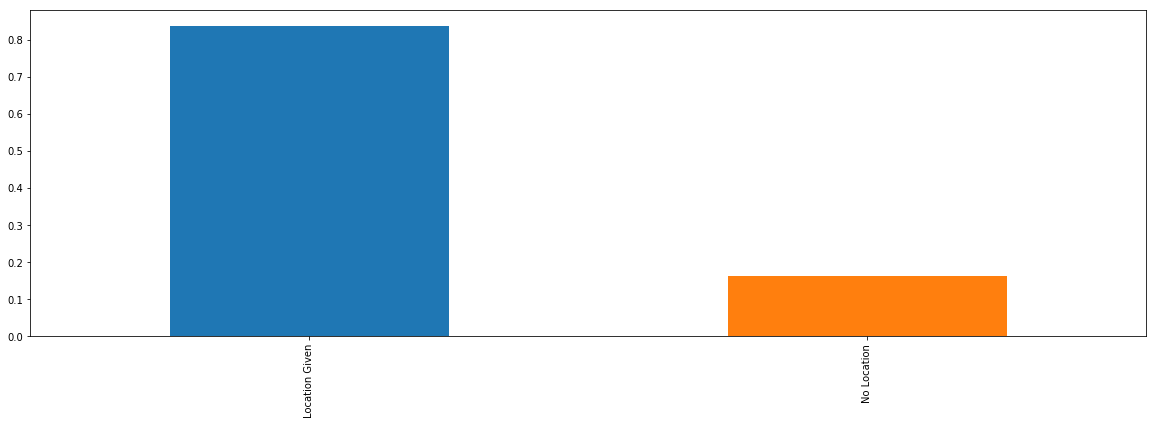

In [10]:
plt.figure(figsize=(20,6))
notnaCount = X_train['region_1'].copy(deep=True)
notnaCount = pd.Series(data=np.where(pd.notna(notnaCount),'Location Given','No Location')).value_counts(normalize=True)
notnaCount.plot(kind='bar')

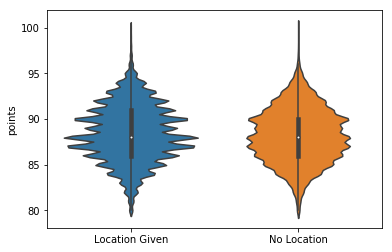

In [26]:
sns.violinplot(x=np.where(pd.notna(X_train['region_1']),'Location Given','No Location'),y=y_train)

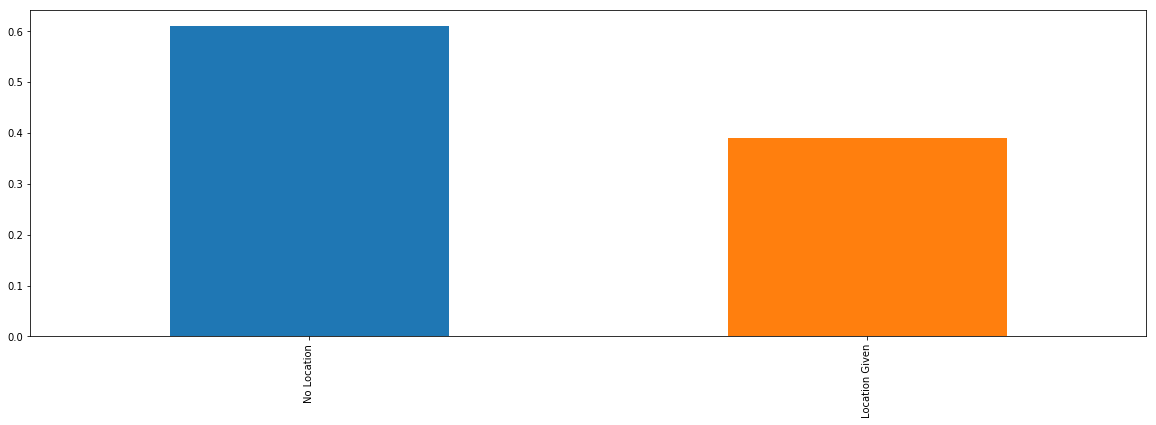

In [11]:
plt.figure(figsize=(20,6))
notnaCount2 = X_train['region_2'].copy(deep=True)
notnaCount2 = pd.Series(data=np.where(pd.notna(notnaCount2),'Location Given','No Location')).value_counts(normalize=True)
notnaCount2.plot(kind='bar')

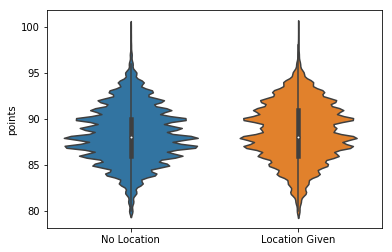

In [27]:
sns.violinplot(x=np.where(pd.notna(X_train['region_2']),'Location Given','No Location'),y=y_train)

These charts show the number of null values for these two columns, region_1 and region_2. What we see is that for region 1, a large majority of the records are not nan. However, in region 2 we see that a majority (60%) of the records are null values. 

I also look at the individual differences in the distributions of no location vs a specified location for each region variable. We see little difference betwee both groups. 